## Importing resources

In [1]:
import numpy as np
import pmomstuff4 as pm
import iscastuff as isca
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import legval
%matplotlib inline

## Load in phase functions and the moments in the netcdf file

In [2]:
# Specifying the root name (and some points for QC)
#rootname = '/Users/Steven/Documents/iceHabitSSPs/solid_column 16-99/Rough000/'
#rootname = '/Users/Steven/Documents/iceHabitSSPs/plate 16-99/Rough000/'
#rootname = '/Users/Steven/Documents/iceHabitSSPs/Rough000_solid_column 0-15/'
#rootname = '/Users/Steven/Documents/iceHabitSSPs/Rough000_plate 0-15/'

#rootname = '/Users/Steven/Documents/iceHabitSSPs/Rough000_plate 0-99/'
#rootname = '/Users/Steven/Documents/iceHabitSSPs/Rough000_solid_column 0-99/'
#rootname = '/Users/Steven/Documents/iceHabitSSPs/Rough050_plate 0-99/'
#rootname = '/Users/Steven/Documents/iceHabitSSPs/Rough050_solid_column 0-99/'
#rootname = '/Users/Steven/Documents/iceHabitSSPs/Rough000_hollow_bullet_rosette 0-99/'
#rootname = '/Users/Steven/Documents/iceHabitSSPs/Rough000_column_8elements 0-99/'
rootname = '/Users/Steven/Documents/iceHabitSSPs/Rough000_plate_10elements 0-99/'

In [3]:
# Append to generate input and output data file names
iscafilename = rootname+'isca.dat'; print (iscafilename)
p11filename = rootname+'P11.dat'; print(p11filename)
ncfilename = rootname+'pmom.nc'; print(ncfilename)

/Users/Steven/Documents/iceHabitSSPs/Rough000_plate_10elements 0-99/isca.dat
/Users/Steven/Documents/iceHabitSSPs/Rough000_plate_10elements 0-99/P11.dat
/Users/Steven/Documents/iceHabitSSPs/Rough000_plate_10elements 0-99/pmom.nc


In [4]:
# Load the netcdf
Npmomarray, pmomarray, \
wnum_mesh, reff_mesh, w0_mesh, qext_mesh, asym_mesh, \
wnum_list, reff_list, maxdim_list, volume_list, parea_list = pm.pmomload2(ncfilename)

In [5]:
# Loads in the isca data
ppa, p11, \
wnum_mesh_isca, reff_mesh_isca, w0_mesh_isca, qext_mesh_isca, asym_mesh_isca, \
wnum_list_isca, reff_list_isca, maxdim_list_isca, volume_list_isca, parea_lis_iscat, = \
isca.loadiscp(iscafilename, p11filename)

This is a 0-99 um file


In [6]:
# This selects certain combinations of wavenumber, scattering angle, and reff for QC
if wnum_list[0] > 50000:
    iwnum_QC = 250; ippa_QC = 310; ireff_QC = 47
else:
    iwnum_QC = 0; ippa_QC = 310; ireff_QC = 100
print 'wavenumber to test:', wnum_list[iwnum_QC], '(wavelength', 1e4/wnum_list[iwnum_QC], ')'
print 'angle to test:', ppa[ippa_QC]
print 'size to test', reff_list[ireff_QC]    

wavenumber to test: [ 3623.1884058] (wavelength [ 2.76] )
angle to test: 10.0
size to test [ 8.98633778]


## This is just graphing the data

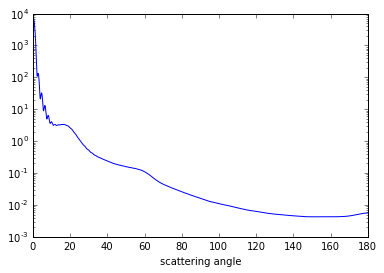

In [7]:
# Graph P11(theta)
plt.semilogy(ppa,p11[:,iwnum_QC,ireff_QC])
plt.xlabel('scattering angle')

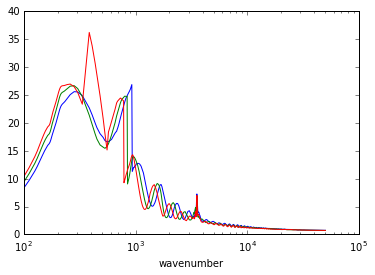

In [8]:
# Graph P11(wavenumber)
plt.semilogx(wnum_list,p11[ippa_QC,:,ireff_QC])
plt.semilogx(wnum_list,p11[ippa_QC,:,ireff_QC+1])
plt.semilogx(wnum_list,p11[ippa_QC,:,ireff_QC+2])
plt.xlabel('wavenumber')

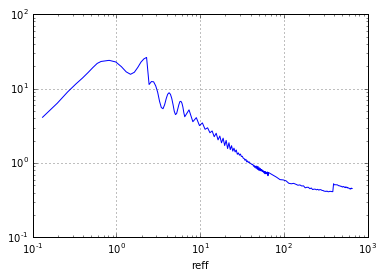

In [9]:
# Graph P11(reff)
plt.loglog(reff_list,p11[ippa_QC,iwnum_QC,:])
plt.xlabel('reff')
plt.grid()

## Compare netcdf Legendre moments to results using a trapezoidal quadrature

In [10]:
# Get the result from the netcdf file
Npnetcdf = Npmomarray[ireff_QC,iwnum_QC]; print Npnetcdf
pnetcdf = pmomarray[ireff_QC,iwnum_QC,0:Npnetcdf]; #print pnetcdf

224


In [11]:
# These are the functions for getting the legendre polynomial and moments using trapezoidal quadrature
def Lfunction(mu,i):
    Lindx = np.identity(i+1)[i]
    Ln = legval(mu,Lindx)
    return Ln
    
def Lmoment(mu,P,i):
    Ln = Lfunction(mu,i)
    result = -np.trapz(Ln*P,mu)/2
    return result

In [12]:
# This calculates moments using trapezoidal quadrature
ptrapezoid = []
mu = np.cos(ppa*np.pi/180); #print mu
p11test = p11[:,iwnum_QC,ireff_QC]
for i in range(Npnetcdf):
    pass
    ptrapezoid.append(Lmoment(mu,p11test,i))

In [13]:
# # This does some graphics to make sure we have calculated the Legendre functions properly
# plt.plot(mu,p11test,mu,Lfunction(mu,0),mu,Lfunction(mu,1),mu,Lfunction(mu,2))
# plt.grid('on')

[ 1.          0.97026123]


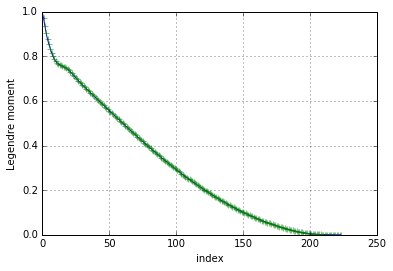

In [14]:
# Legendre moments
inetcdf = range(0,Npnetcdf)
plt.plot(inetcdf,pnetcdf,inetcdf,ptrapezoid,'+')
plt.xlabel('index')
plt.ylabel('Legendre moment')
plt.grid('on')
print (pnetcdf[0:2])

## Compare asymmetry parameters

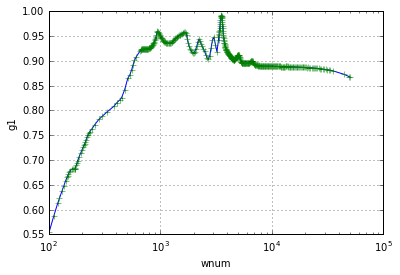

In [15]:
# asymmetry parameter - as a function of wavenumber
pnetcdf_of_wnum = pmomarray[ireff_QC,:,1]
plt.semilogx(wnum_list,pnetcdf_of_wnum,wnum_list_isca,asym_mesh_isca[ireff_QC,:],'+')
plt.xlabel('wnum')
plt.ylabel('g1')
plt.grid('on')

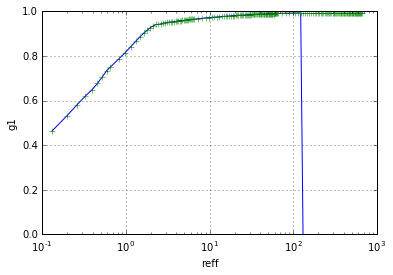

In [16]:
# asymmetry parameter - as a function of reff
pnetcdf_of_reff = pmomarray[:,iwnum_QC,1]
plt.semilogx(reff_list,pnetcdf_of_reff,reff_list_isca,asym_mesh_isca[:,iwnum_QC],'+')
plt.xlabel('reff')
plt.ylabel('g1')
plt.grid('on')

## Compare qext

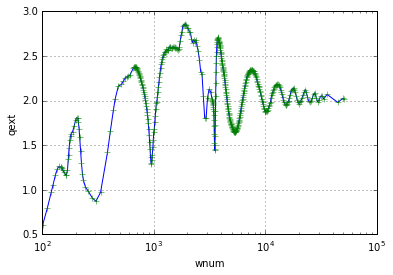

In [17]:
# qext - as a function of wavenumber
plt.semilogx(wnum_list,qext_mesh[ireff_QC,:],wnum_list_isca,qext_mesh[ireff_QC,:],'+')
plt.xlabel('wnum')
plt.ylabel('qext')
plt.grid('on')

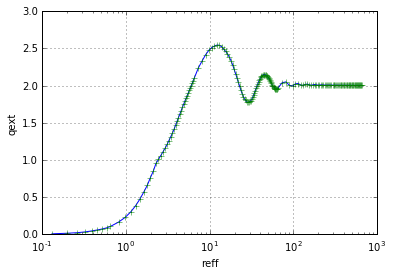

In [18]:
# qext - as a function of reff
plt.semilogx(reff_list,qext_mesh[:,iwnum_QC],reff_list_isca,qext_mesh[:,iwnum_QC],'+')
plt.xlabel('reff')
plt.ylabel('qext')
plt.grid('on')

## Compare w0

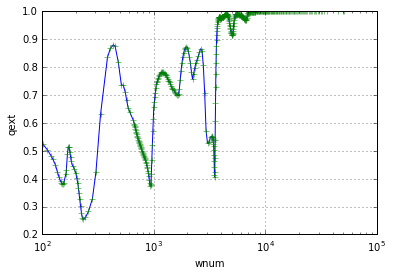

In [19]:
# w0 - as a function of wavenumber
plt.semilogx(wnum_list,w0_mesh[ireff_QC,:],wnum_list_isca,w0_mesh[ireff_QC,:],'+')
plt.xlabel('wnum')
plt.ylabel('qext')
plt.grid('on')

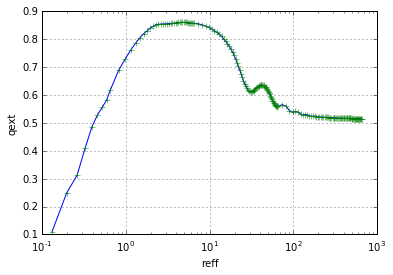

In [20]:
# w0 - as a function of reff
plt.semilogx(reff_list,w0_mesh[:,iwnum_QC],reff_list_isca,w0_mesh[:,iwnum_QC],'+')
plt.xlabel('reff')
plt.ylabel('qext')
plt.grid('on')